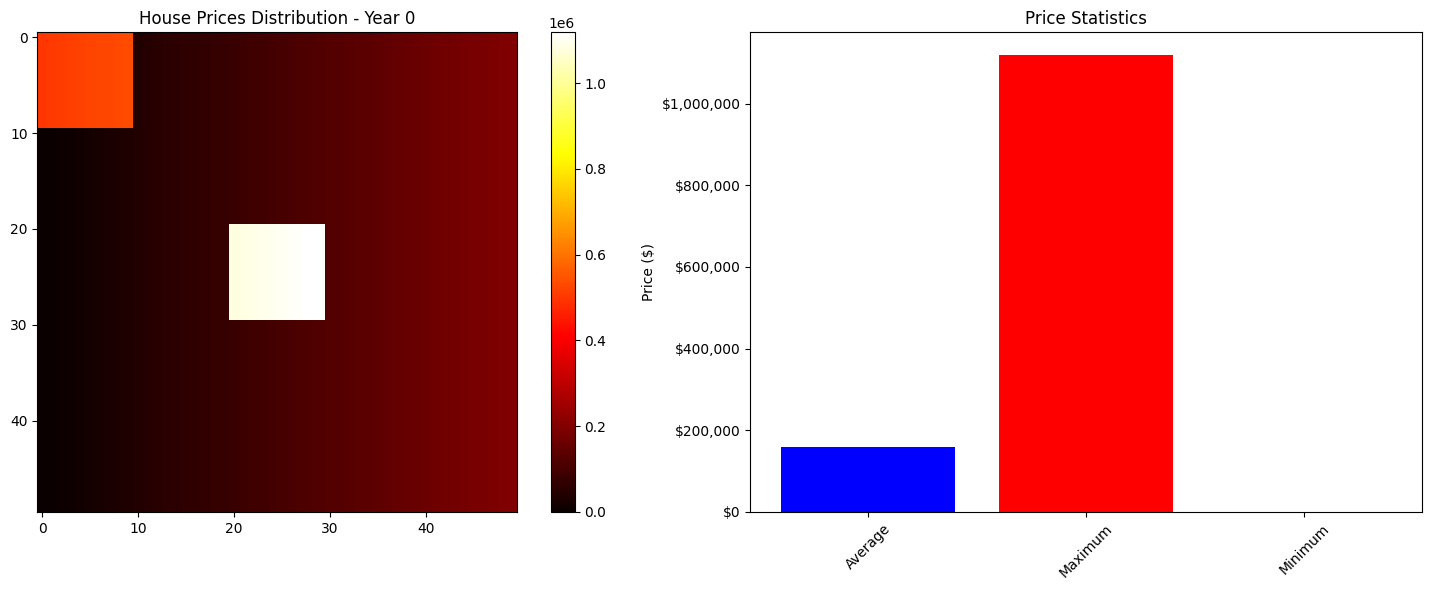


Year 0 Statistics:
Average Price: $160,000.00
Maximum Price: $1,118,367.35
Minimum Price: $0.00


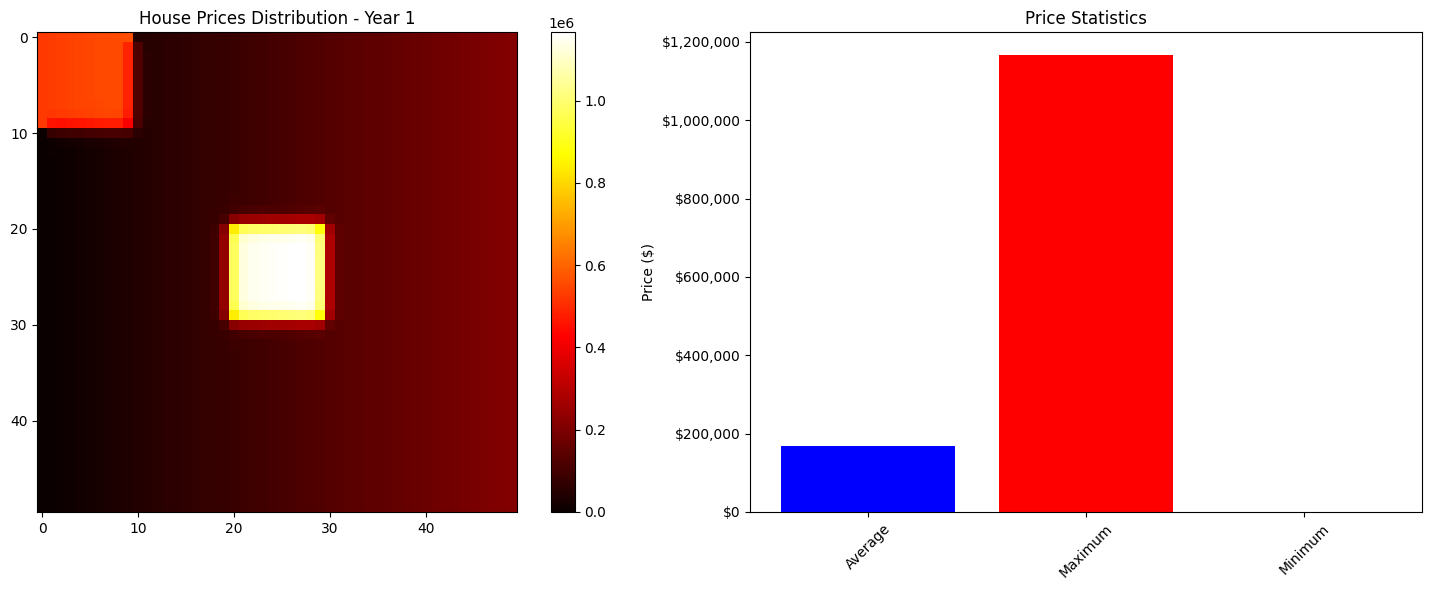


Year 1 Statistics:
Average Price: $168,201.27
Maximum Price: $1,166,132.77
Minimum Price: $0.00


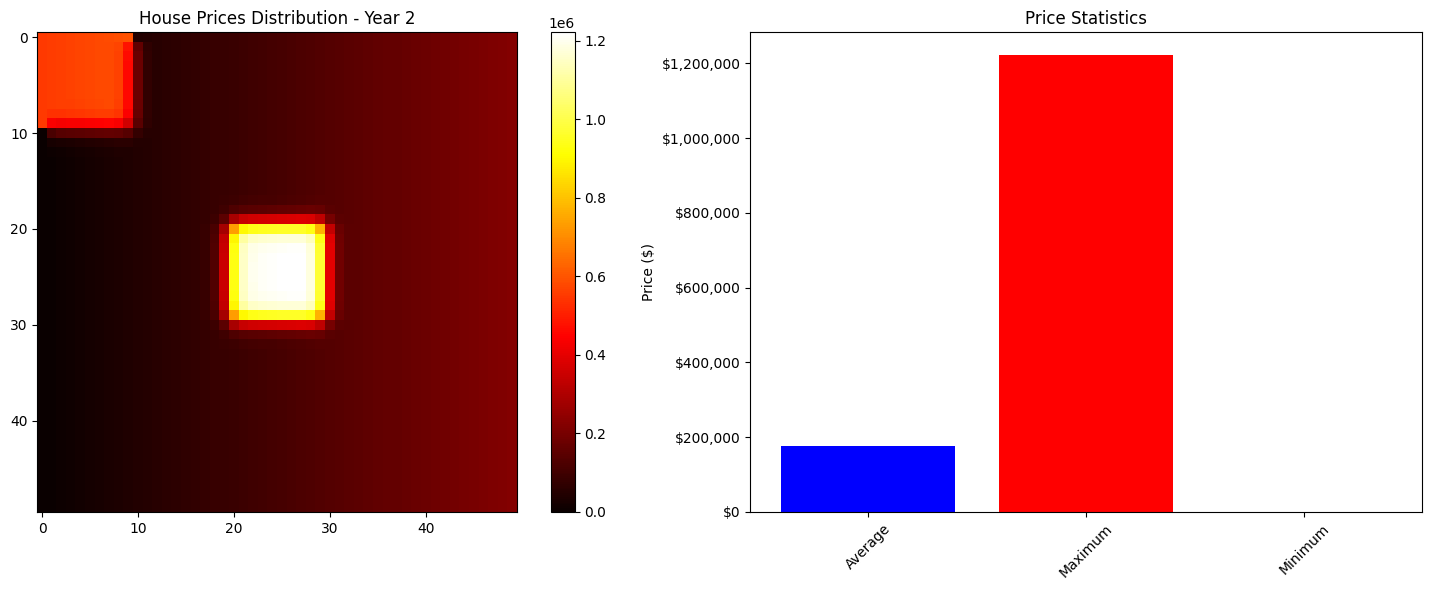


Year 2 Statistics:
Average Price: $176,822.93
Maximum Price: $1,221,794.20
Minimum Price: $0.00


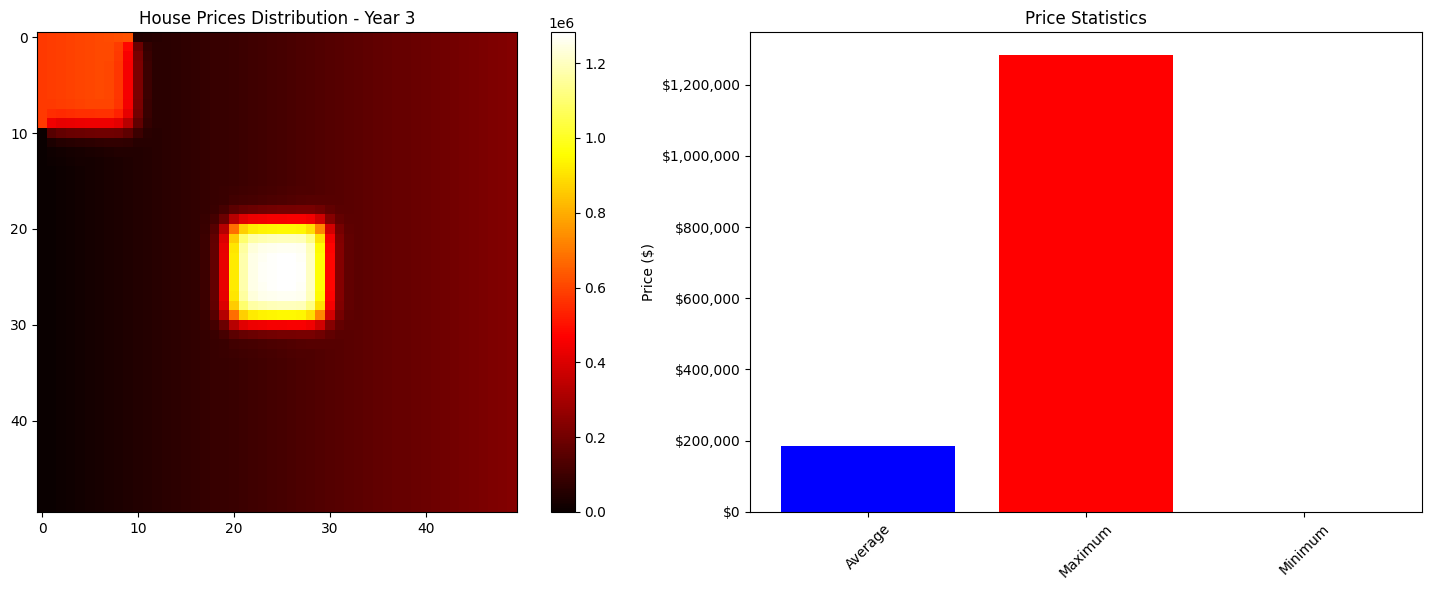


Year 3 Statistics:
Average Price: $185,886.51
Maximum Price: $1,282,523.01
Minimum Price: $0.00


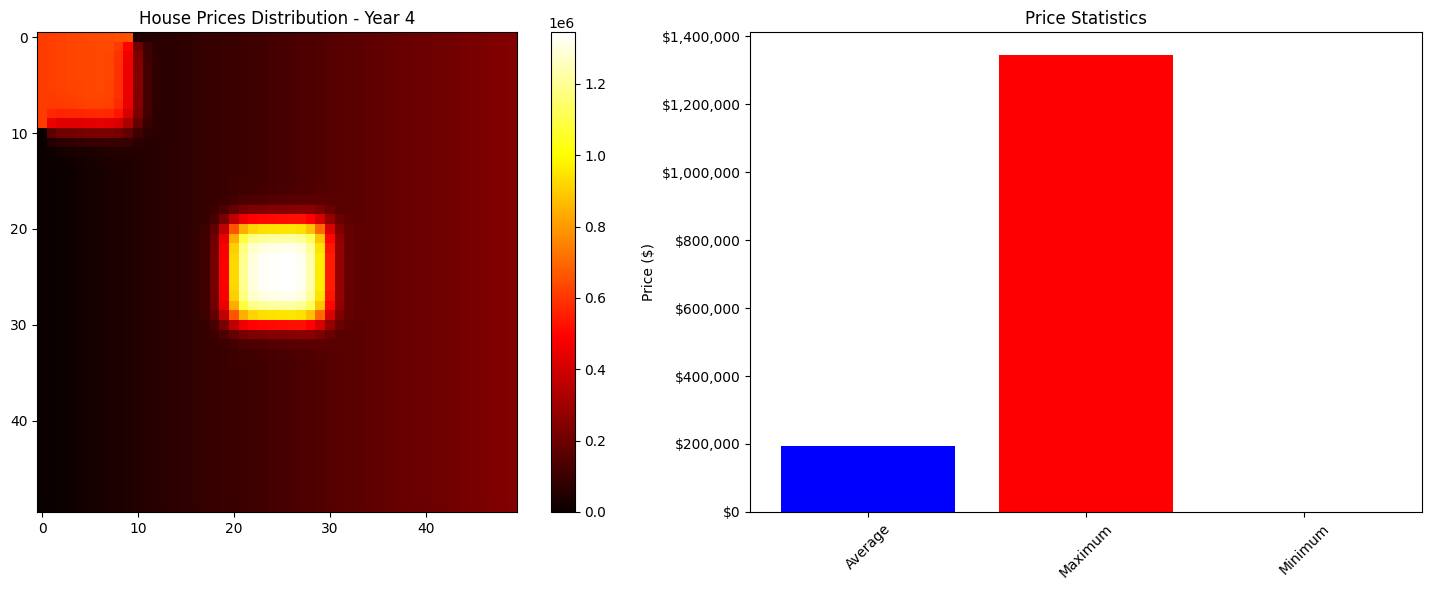


Year 4 Statistics:
Average Price: $195,414.67
Maximum Price: $1,344,391.67
Minimum Price: $0.00


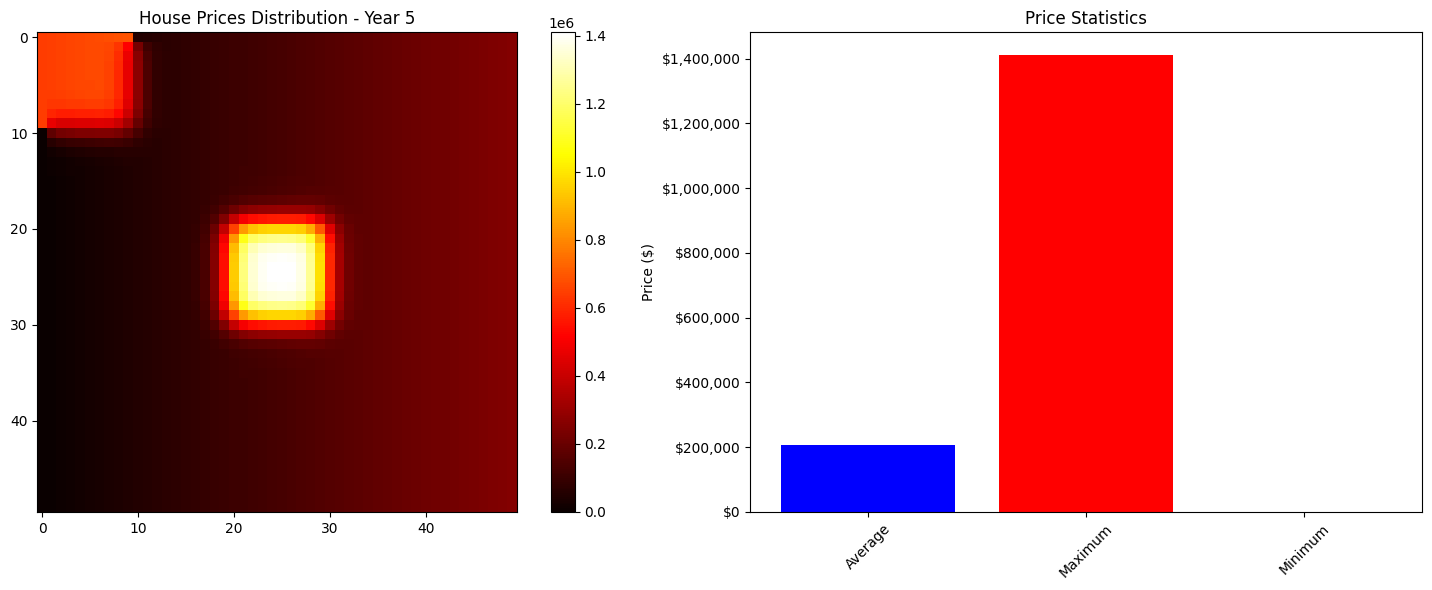


Year 5 Statistics:
Average Price: $205,431.23
Maximum Price: $1,410,307.69
Minimum Price: $0.00


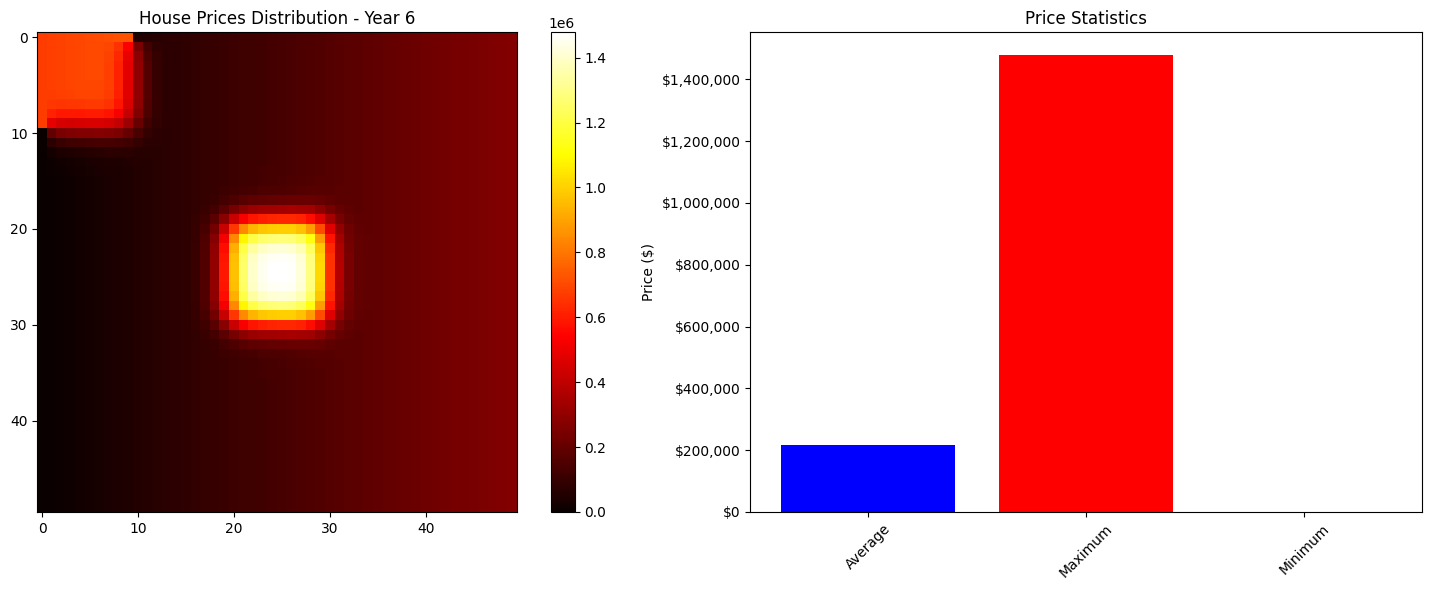


Year 6 Statistics:
Average Price: $215,961.22
Maximum Price: $1,478,169.79
Minimum Price: $0.00


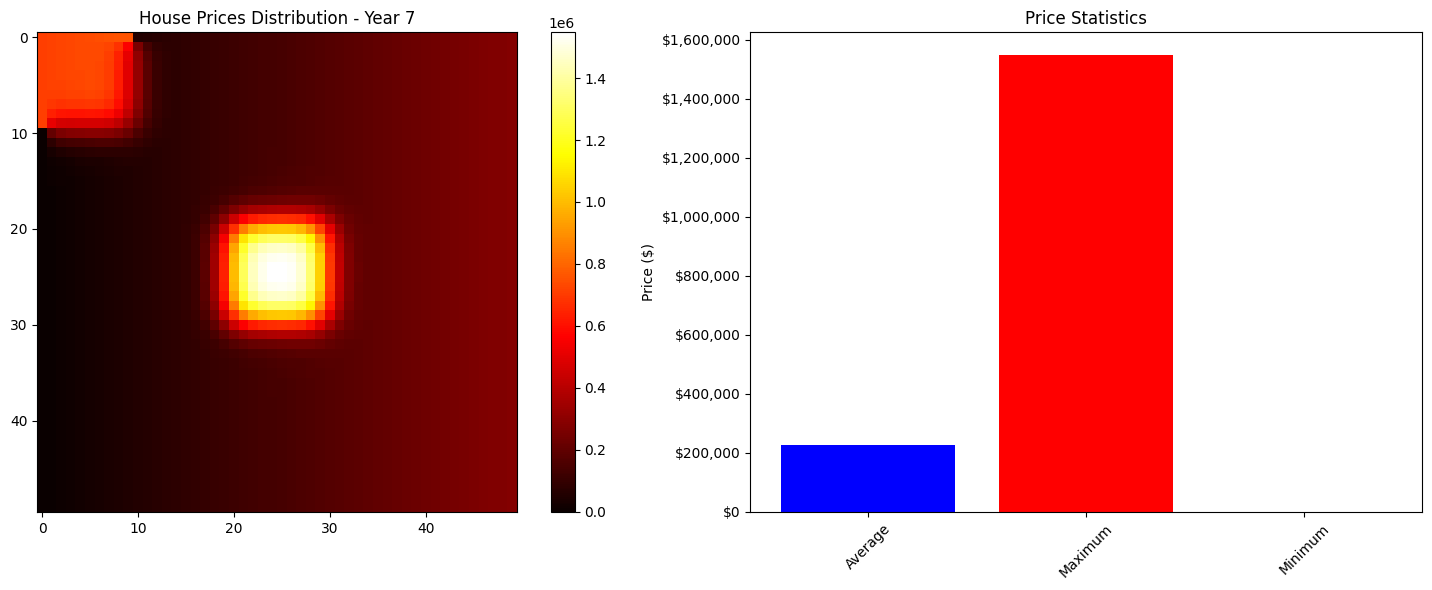


Year 7 Statistics:
Average Price: $227,030.95
Maximum Price: $1,547,374.06
Minimum Price: $0.00


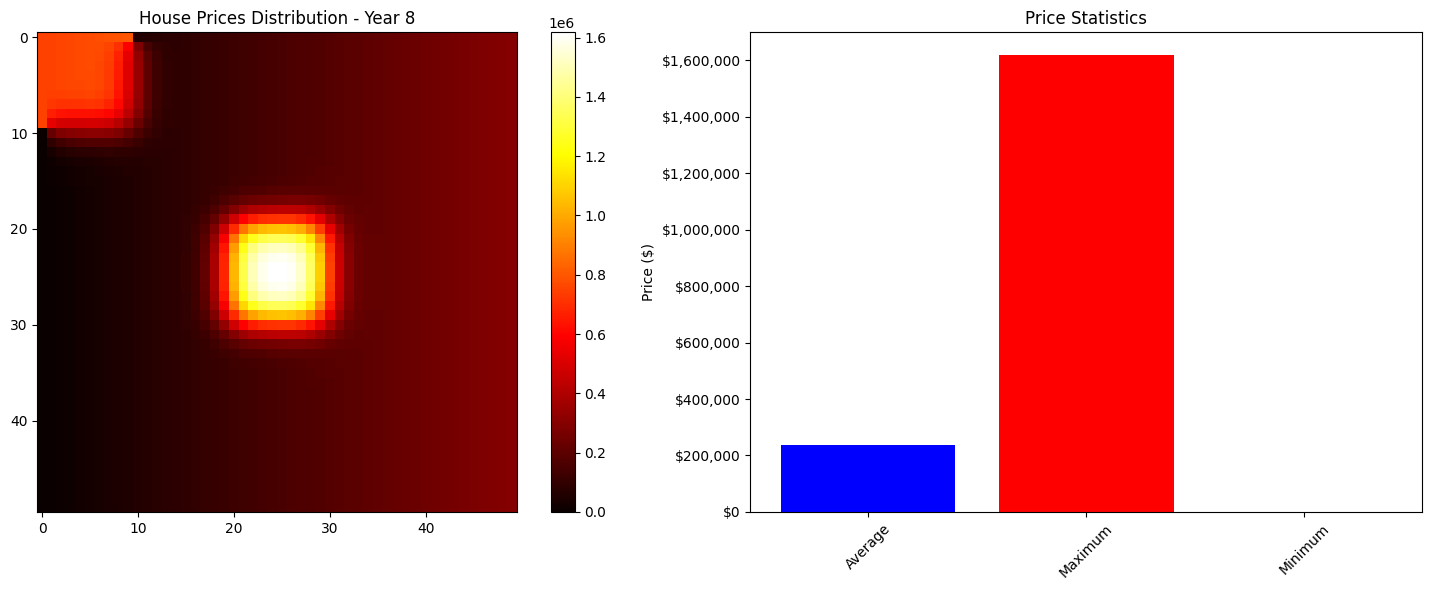


Year 8 Statistics:
Average Price: $238,668.10
Maximum Price: $1,617,745.79
Minimum Price: $0.00


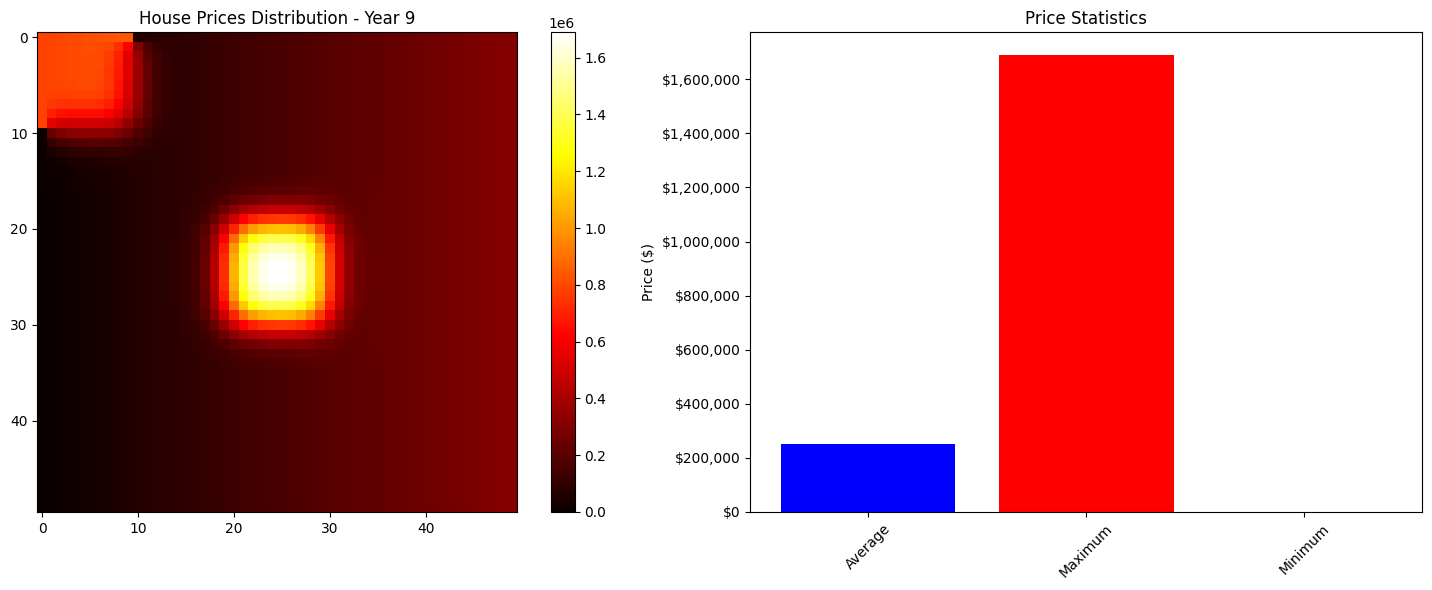


Year 9 Statistics:
Average Price: $250,901.76
Maximum Price: $1,689,202.49
Minimum Price: $0.00


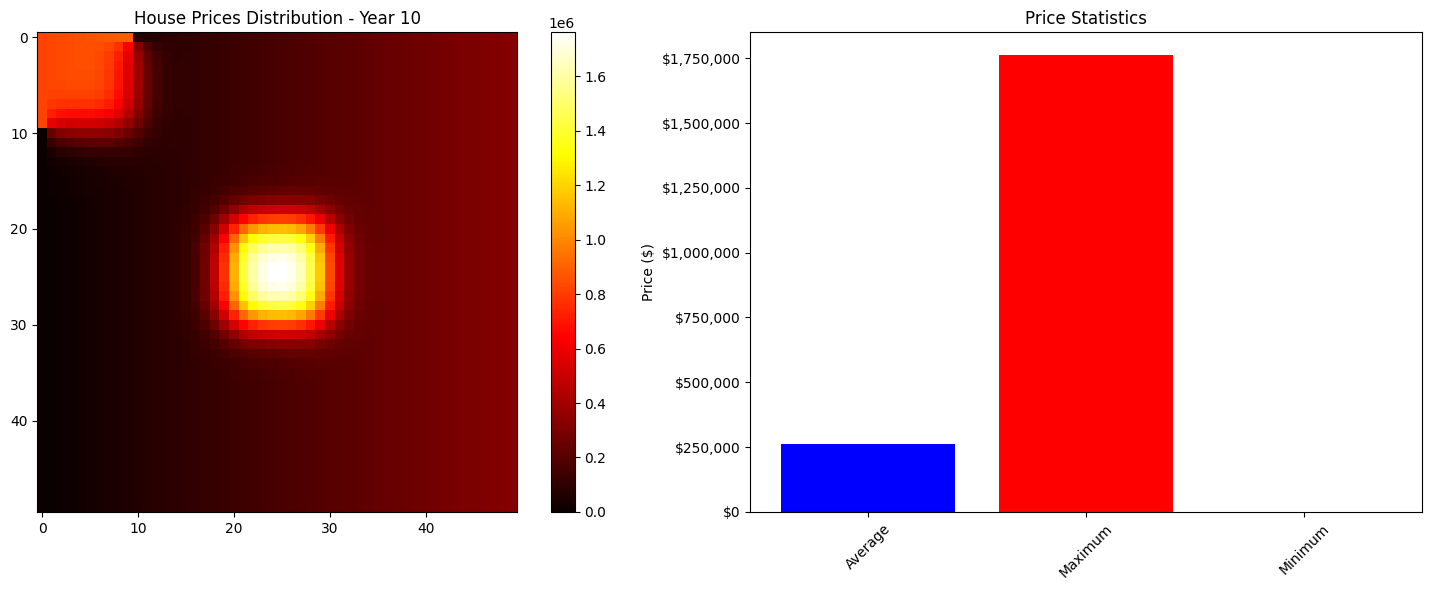


Year 10 Statistics:
Average Price: $263,762.51
Maximum Price: $1,761,741.24
Minimum Price: $0.00


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def simulate_prices(P0, T, alpha, beta, dx=1, dt=0.01):
    """
    Simulate price evolution using finite difference method.
    
    Args:
        P0 (np.array): Initial price distribution
        T (int): Number of years to simulate
        alpha (float): Diffusion coefficient
        beta (float): Development factor
        dx (float): Spatial step size
        dt (float): Time step size
    
    Returns:
        list: Price distributions for each year
    """
    N = P0.shape[0]
    steps_per_year = int(1 / dt)
    P = P0.copy()
    yearly_states = [P0.copy()]
    
    for year in range(T):
        for _ in range(steps_per_year):
            # Compute Laplacian using finite differences
            laplacian = np.zeros_like(P)
            for i in range(1, N-1):
                for j in range(1, N-1):
                    laplacian[i,j] = (P[i+1,j] + P[i-1,j] + P[i,j+1] + P[i,j-1] - 4*P[i,j]) / (dx*dx)
            
            # Update prices using the PDE
            dP = alpha * laplacian + beta * P
            P += dt * dP
        
        yearly_states.append(P.copy())
    
    return yearly_states

def visualize_evolution_notebook(states):
    """
    Create an interactive visualization suitable for Jupyter notebooks.
    
    Args:
        states (list): List of price distributions for each year
    """
    for t, state in enumerate(states):
        # clear_output(wait=True)
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Heatmap
        im = ax1.imshow(state, cmap='hot')
        plt.colorbar(im, ax=ax1)
        ax1.set_title(f'House Prices Distribution - Year {t}')
        
        # Statistics plot
        stats = {
            'Average': state.mean(),
            'Maximum': state.max(),
            'Minimum': state.min()
        }
        ax2.bar(stats.keys(), stats.values(), color=['blue', 'red', 'green'])
        ax2.set_title('Price Statistics')
        ax2.set_ylabel('Price ($)')
        # Format y-axis labels as currency
        ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print(f"\nYear {t} Statistics:")
        print(f"Average Price: ${stats['Average']:,.2f}")
        print(f"Maximum Price: ${stats['Maximum']:,.2f}")
        print(f"Minimum Price: ${stats['Minimum']:,.2f}")
        
        # Add a small delay to make the animation visible
        time.sleep(1.5)

# Example usage
N = 50
T = 10
alpha = 0.2
beta = 0.05

# Create initial conditions with more interesting patterns
P0 = np.zeros((N, N))
# Central expensive district
P0[20:30, 20:30] = 1000000
# Secondary wealthy area
P0[0:10, 0:10] = 500000

# Add a linear gradient from left to right to simulate location preference
x = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, x)

P0 += 200000 * X  # Base price increases from left to right

# Simulate and visualize
states = simulate_prices(P0, T, alpha, beta)
visualize_evolution_notebook(states)